In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = np.load('../EFC3/bloodmnist.npz')

In [3]:
TrainX = data["train_images"]
TrainY = data["train_labels"]
ValX = data["val_images"]
ValY = data["val_labels"]
TestX = data["test_images"]
TestY = data["test_labels"]

In [4]:
print(f'dados de treinamento: \n {len(TrainX[0])}')

print('--'*20)
print(f'\n {TrainX/255}')

dados de treinamento: 
 28
----------------------------------------

 [[[[0.98039216 0.8745098  0.80784314]
   [1.         0.89803922 0.83137255]
   [0.98431373 0.87058824 0.80784314]
   ...
   [1.         0.93333333 0.76470588]
   [0.98431373 0.90196078 0.7254902 ]
   [1.         0.91764706 0.74901961]]

  [[1.         0.89803922 0.82352941]
   [1.         0.89803922 0.82352941]
   [0.95686275 0.84313725 0.78039216]
   ...
   [0.99607843 0.90980392 0.75686275]
   [0.99607843 0.91372549 0.74509804]
   [1.         0.94901961 0.78823529]]

  [[1.         0.90588235 0.81568627]
   [1.         0.89019608 0.80392157]
   [0.93333333 0.82352941 0.74117647]
   ...
   [1.         0.91372549 0.79215686]
   [0.98431373 0.89803922 0.75294118]
   [1.         0.94901961 0.79607843]]

  ...

  [[0.91372549 0.8        0.6745098 ]
   [0.9372549  0.82352941 0.70588235]
   [0.96078431 0.85490196 0.7372549 ]
   ...
   [1.         0.88235294 0.78039216]
   [1.         0.88627451 0.78431373]
   [1.         

In [5]:
TrainX_n = TrainX/255
TestX_n = TestX/255
ValX_n = ValX/255

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, kernel_size=(3,3),activation='relu',input_shape=(28,28,3)),   # Gera um feature-map de 26x26x20, uma vez que não estou considerando padding
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8,activation='softmax')
])

model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()



c:\Users\Jitesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 10)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1690)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │        13,528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,808 (53.94 KB)

 Trainable params: 13,808 (53.94 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
tam = [10, 12, 14, 16, 18, 20]
ker = [3, 4, 5]
best_accuracy = 0
best_tam = None
best_ker = None


for i in tam:

    for j in ker:

        model = tf.keras.Sequential([
                tf.keras.layers.Conv2D(i, kernel_size=(j,j),activation='relu',input_shape=(28,28,3)),   # Gera um feature-map de 26x26x20, uma vez que não estou considerando padding
                tf.keras.layers.MaxPooling2D((2,2)),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(8,activation='softmax')
        ])
        model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
        
        hist = model.fit(TrainX_n, TrainY, batch_size=8, epochs=30, verbose=1, validation_data=(ValX_n, ValY), callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))

        val_acc = model.evaluate(ValX_n,ValY)

        print(f'Qntde de Kernel {i} para o tamanho {j}: acc = {val_acc[1]} \n')

        if val_acc[1] > best_accuracy:
            best_accuracy = val_acc[1]
            best_tam = i
            best_ker = j

print(f'A melhor quantidade e melhor tamanho é {best_tam}, {best_ker}, respectivamente')



Epoch 1/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step - accuracy: 0.4086 - loss: 1.5453 - val_accuracy: 0.5917 - val_loss: 1.0896
Epoch 2/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.6359 - loss: 0.9739 - val_accuracy: 0.6752 - val_loss: 0.8453
Epoch 3/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.7308 - loss: 0.7738 - val_accuracy: 0.7845 - val_loss: 0.6628
Epoch 4/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.7602 - loss: 0.7017 - val_accuracy: 0.7804 - val_loss: 0.6323
Epoch 5/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.7861 - loss: 0.6160 - val_accuracy: 0.8008 - val_loss: 0.5833
Epoch 6/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - accuracy: 0.7991 - loss: 0.5895 - val_accuracy: 0.8183 - val_loss: 0.5550
Epoch 7/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.8241 - loss: 0.5160 - val_accuracy: 0.8213 - val_loss: 0.5228
Epoch 8/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step - accuracy: 0.8328 -

In [11]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(best_tam, kernel_size=(best_ker,best_ker),activation='relu',input_shape=(28,28,3)),   # Gera um feature-map de 26x26x20, uma vez que não estou considerando padding
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(8,activation='softmax')
])
model.compile(optimizer='SGD',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])
        
model.summary()

c:\Users\Jitesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 26, 26, 20)     │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 13, 13, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 3380)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 8)              │        27,048 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,608 (107.84 KB)

 Trainable params: 27,608 (107.84 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
hist = model.fit(TrainX_n, TrainY, batch_size=8, epochs=30, verbose=1, validation_data=(ValX_n, ValY), callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))

Epoch 1/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4120 - loss: 1.5360 - val_accuracy: 0.6606 - val_loss: 0.9070
Epoch 2/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.6871 - loss: 0.8773 - val_accuracy: 0.7512 - val_loss: 0.7004
Epoch 3/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.7433 - loss: 0.7283 - val_accuracy: 0.7856 - val_loss: 0.6315
Epoch 4/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.7768 - loss: 0.6347 - val_accuracy: 0.8248 - val_loss: 0.5473
Epoch 5/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - accuracy: 0.8009 - loss: 0.5754 - val_accuracy: 0.8067 - val_loss: 0.5481
Epoch 6/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.8212 - loss: 0.5219 - val_accuracy: 0.8207 - val_loss: 0.5129
Epoch 7/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - accuracy: 0.8306 - loss: 0.4924 - val_accuracy: 0.8557 - val_loss: 0.4451
Epoch 8/30
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - accuracy: 0.8519 - l

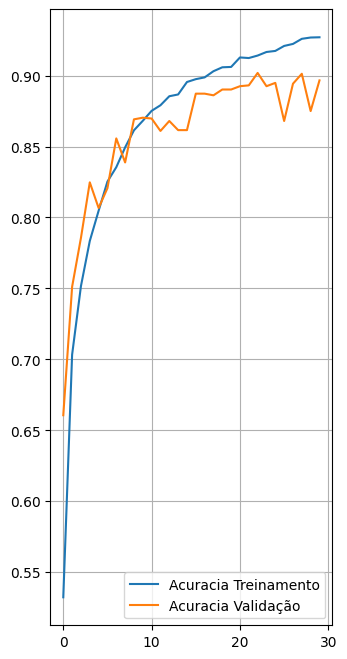

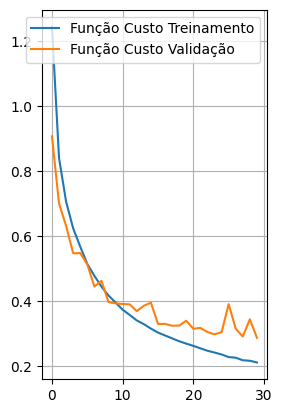

In [13]:
acc = hist.history['accuracy']
validation_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

range_epochs = np.arange(30)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range_epochs,acc, label='Acuracia Treinamento')
plt.plot(range_epochs,validation_acc, label='Acuracia Validação')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

plt.subplot(1,2,2)
plt.plot(range_epochs,loss, label='Função Custo Treinamento')
plt.plot(range_epochs,val_loss, label='Função Custo Validação')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [14]:
import itertools
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.8747 - loss: 0.3664
Função-Custo: 0.32919058203697205
Acurácia: 0.8880444169044495
----------------------------------------------------------------------------------------------------


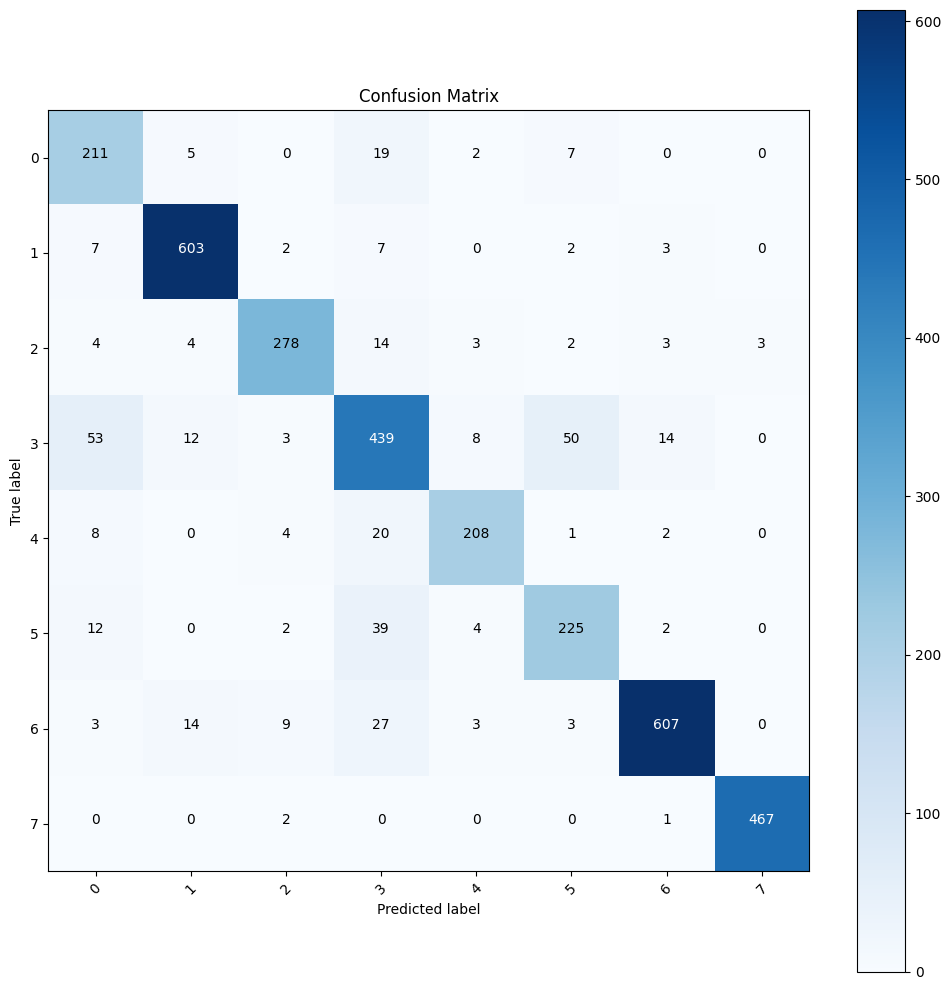

In [15]:
from sklearn.metrics import confusion_matrix
import pandas as pd

pred = model.predict(TestX_n)

y_pred = np.empty((len(pred),1),dtype=int)
for i in range(len(pred)):
    y_pred[i,0] = np.argmax(pred[i])

score = model.evaluate(TestX_n,TestY)

print(f'Função-Custo: {score[0]}')
print(f'Acurácia: {score[1]}')

print('--'*50)

cm = confusion_matrix(TestY,y_pred)
plot_confusion_matrix(cm, ['0', '1', '2', '3', '4', '5', '6', '7'], normalize=False, title='Confusion Matrix')

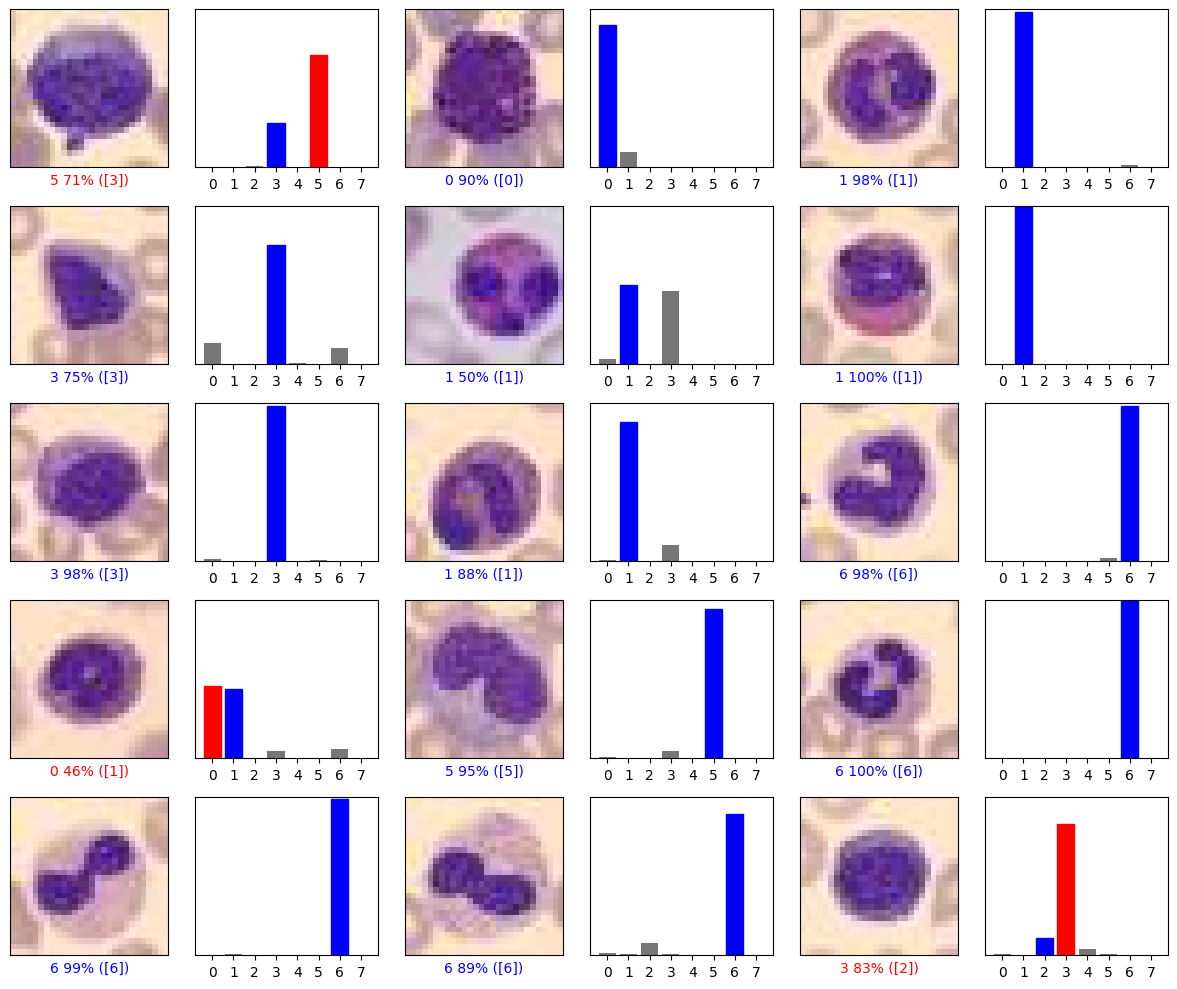

In [16]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(8))
  plt.yticks([])
  thisplot = plt.bar(range(8), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')



num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred[i], TestY, TestX)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred[i], TestY)
plt.tight_layout()
plt.show()



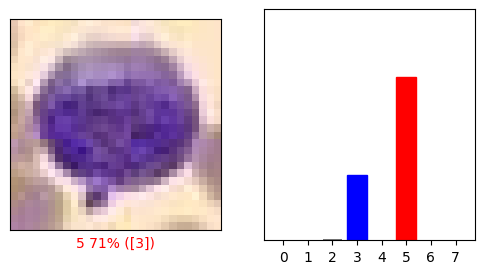

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], TestY, TestX)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  TestY)
plt.show()

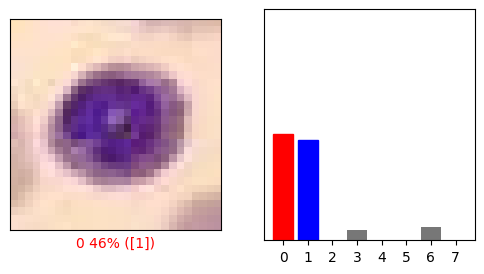

In [24]:
i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], TestY, TestX)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  TestY)
plt.show()

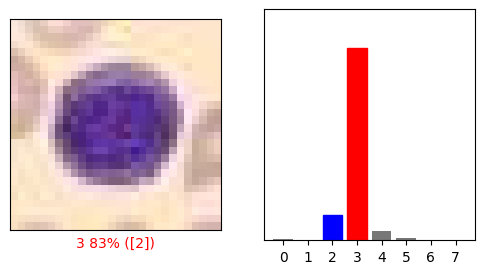

In [17]:
i = 14
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], TestY, TestX)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  TestY)
plt.show()

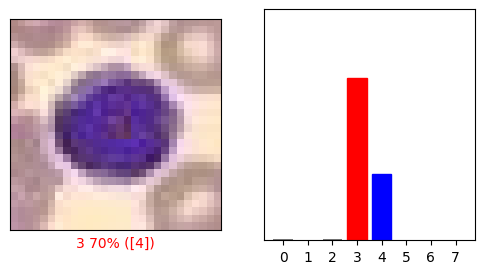

In [21]:
i = 19

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], TestY, TestX)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  TestY)
plt.show()

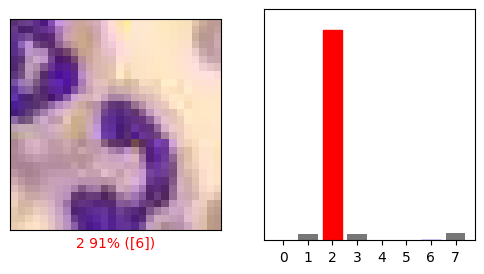

In [30]:
i = 25
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], TestY, TestX)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  TestY)
plt.show()